# Interp 7: Building in structural biases

In the previous notebook, we have shown how to test hypothesis for a trained model. If you are content with the insights (tree structure and symmetry properties), you can simply stop here. However, if you want to leverage these properties and apply these inductive biases to your neural network, this notebook walks you through a few possiblities.

In [1]:
from kan import *

Case 1: Separability

* if you have confirmed that $f(x_1,x_2,x_3,x_4)=f_1(x_1)f_2(x_2)f_3(x_3)f_4(x_4)$, you can make the last operation to be multiplication. And you can use model.module to create modules so that variables do not interact.

checkpoint directory created: ./model
saving model version 0.0


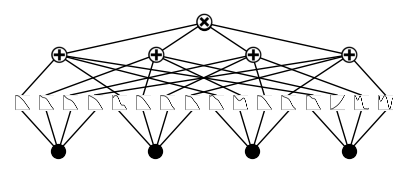

In [2]:
model = KAN(width=[4,[0,1]], mult_arity=4, grid=5, k=3) # note [0,1] means in the output layer, 0 sum node and 1 mult node
x = torch.rand(100,4)*2-1
model(x)
model.plot(beta=1000)

checkpoint directory created: ./model
saving model version 0.0
saving model version 0.1
saving model version 0.2
saving model version 0.3
saving model version 0.4


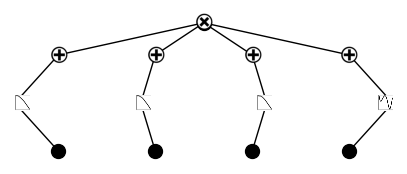

In [3]:
# to specify a module, you need to specify the start layer (0 in this case),
# you also need to specify which neurons belong to this module
# the rule might be a bit complicated to explain, but you will observe the pattern with a few examples. 
model = KAN(width=[4,[0,1]], mult_arity=4, grid=5, k=3) # note [0,1] means in the output layer, 0 sum node and 1 mult node
x = torch.rand(100,4)*2-1
model(x)

model.module(0,'[0]->[0]')
model.module(0,'[1]->[1]')
model.module(0,'[2]->[2]')
model.module(0,'[3]->[3]')

model.plot(beta=1000)

checkpoint directory created: ./model
saving model version 0.0
saving model version 0.1
saving model version 0.2


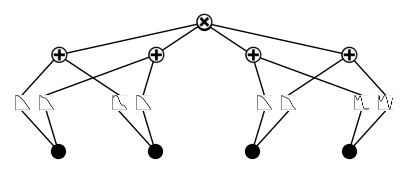

In [4]:
model = KAN(width=[4,[0,1]], mult_arity=4, grid=5, k=3) # note [0,1] means in the output layer, 0 sum node and 1 mult node
x = torch.rand(100,4)*2-1
model(x)

model.module(0,'[0,1]->[0,1]')
model.module(0,'[2,3]->[2,3]')

model.plot(beta=1000)

checkpoint directory created: ./model
saving model version 0.0
saving model version 0.1
saving model version 0.2


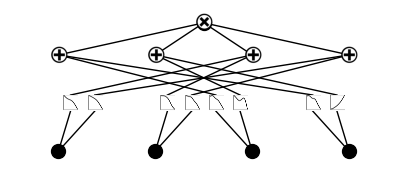

In [5]:
model = KAN(width=[4,[0,1]], mult_arity=4, grid=5, k=3) # note [0,1] means in the output layer, 0 sum node and 1 mult node
x = torch.rand(100,4)*2-1
model(x)

model.module(0,'[0,1]->[2,3]')
model.module(0,'[2,3]->[0,1]')

model.plot(beta=1000)

checkpoint directory created: ./model
saving model version 0.0
saving model version 0.1
saving model version 0.2


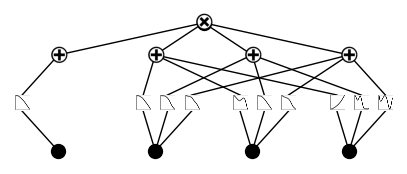

In [6]:
model = KAN(width=[4,[0,1]], mult_arity=4, grid=5, k=3) # note [0,1] means in the output layer, 0 sum node and 1 mult node
x = torch.rand(100,4)*2-1
model(x)

model.module(0,'[0]->[0]')
model.module(0,'[1,2,3]->[1,2,3]')

model.plot(beta=1000)

Case 2: you can use model.module smartly to create tree graphs.

checkpoint directory created: ./model
saving model version 0.0


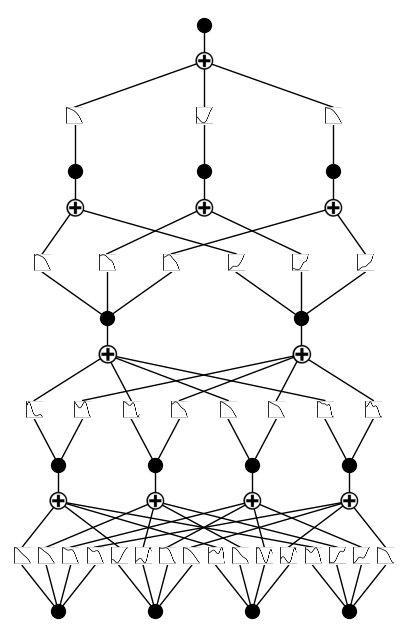

In [7]:
# a tree case
seed = 0
model = KAN(width=[4,4,2,3,1], grid=3, k=3, seed=seed)
x = torch.rand(100,4)*2-1
model(x)
model.plot(beta=1000)

checkpoint directory created: ./model
saving model version 0.0
saving model version 0.1
saving model version 0.2


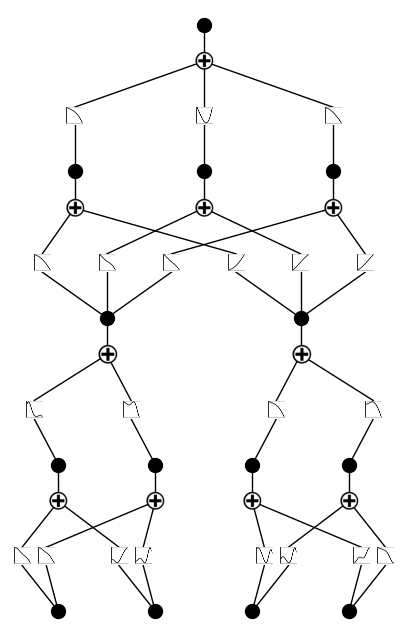

In [8]:
# a tree case
seed = 0
model = KAN(width=[4,4,2,3,1], grid=3, k=3, seed=seed)
x = torch.rand(100,4)*2-1

model.module(0,'[0,1]->[0,1]->[0,1]->[0]')
model.module(0,'[2,3]->[2,3]->[2,3]->[1]')
#model.module(2,'[0]->[0,1,2]')
#model.module(2,'[1]->[3,4,5]')

model(x)
model.plot(beta=1000)

In [9]:
# a formula with a two-level tree structure
f = lambda x: torch.sin(x[:,[0]]**2+x[:,[1]]**2)+torch.sin(x[:,[2]]**2+x[:,[3]]**2)
dataset = create_dataset(f, n_var=4)

model.fit(dataset, steps=50, lamb=2e-3, reg_metric='edge_forward_n');

| train_loss: 3.84e-02 | test_loss: 4.00e-02 | reg: 1.17e+01 | : 100%|█| 50/50 [00:24<00:00,  2.03it

saving model version 0.3


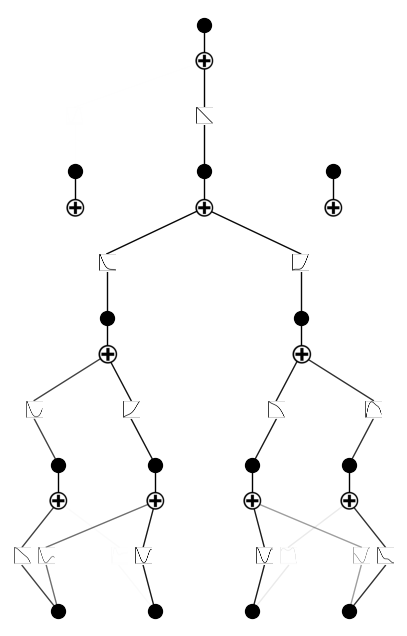

In [10]:
model.plot()